In [1]:
import numpy as np
import torch
from torch import nn
from tropical import Tropical, TropicalMonomial, TropicalPolynomial
from tropical import to_tensor, Tropical, TropicalMonomial, TropicalPolynomial, PolyNet, DiffPolyNet

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import JuPyMake
JuPyMake.InitializePolymake()
JuPyMake.ExecuteCommand("application 'tropical';")

(True, '', '', '')

In [5]:
# = (−1x2)⊕(xy)⊕(−1y2)⊕x⊕y⊕(−1) 

JuPyMake.ExecuteCommand('$a = toTropicalPolynomial("max(-1+2*x0,x0+x1,-1+2*x1,x0,x1,-1)");')

(True, '', '', '')

In [6]:
JuPyMake.ExecuteCommand('print $a;')

(True, '-1*x_0^2 + x_0*x_1 + x_0 + -1*x_1^2 + x_1 + -1', '', '')

In [7]:
# =-0.5x2⊕(1xy)⊕(−2y2)⊕x⊕y⊕0

JuPyMake.ExecuteCommand('$b = toTropicalPolynomial("max(-0.5+2*x0,1+x0+x1,-2+2*x1,x0,x1,0)");')

(True, '', '', '')

In [8]:
JuPyMake.ExecuteCommand('print $b;')

(True, '-1/2*x_0^2 + 1*x_0*x_1 + x_0 + -2*x_1^2 + x_1 + 0', '', '')

In [9]:
JuPyMake.ExecuteCommand('$c = $a * $b;')

(True, '', '', '')

In [10]:
JuPyMake.ExecuteCommand('print $c;')

(True,
 '-3/2*x_0^4 + x_0^3*x_1 + -1/2*x_0^3 + 1*x_0^2*x_1^2 + 1*x_0^2*x_1 + x_0^2 + x_0*x_1^3 + 1*x_0*x_1^2 + x_0*x_1 + x_0 + -3*x_1^4 + -1*x_1^3 + x_1^2 + x_1 + -1',
 '',
 '')

# Строим subdivision of polynomial a

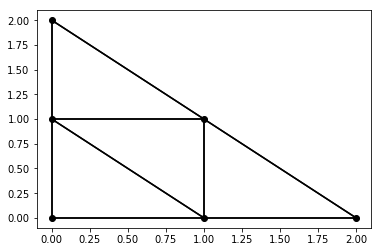

In [28]:
JuPyMake.ExecuteCommand(f'$V = new Hypersurface<Max>(POLYNOMIAL=>$a);')
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')
JuPyMake.ExecuteCommand('$pc = $ds->POLYHEDRAL_COMPLEX;')
pts = JuPyMake.ExecuteCommand('print $pc->VERTICES;')[1]

pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('print $pc->GRAPH->ADJACENCY;')[1]
adj = np.array([[int(j) for j in i[1:-1].split()] for i in adj.split('\n')[:-1]])

new_simp = []
for i, vv in enumerate(adj):
    for j, v in enumerate(vv):
        new_simp.append([i,v])            

plt.plot(pts[:,0], pts[:,1], 'o', color='black')
for simplex in new_simp:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-') 

In [29]:
JuPyMake.ExecuteCommand('print $V->IS_BALANCED;')

(True, 'true', '', '')

In [30]:
JuPyMake.ExecuteCommand('print $V->IS_IRREDUCIBLE;')

(True, 'true', '', '')

In [31]:
JuPyMake.ExecuteCommand('print $V->RAYS;')

(True, '1 0 0\n0 0 -1\n0 0 1\n', '', '')

In [32]:
JuPyMake.ExecuteCommand('print $V->WEIGHTS;')

(True, '1', '', '')

In [33]:
JuPyMake.ExecuteCommand('print $V->WEIGHT_CONE->RAYS;')

(True, '1\n', '', '')

# Строим subdivision of polynomial b

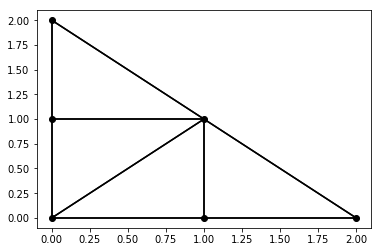

In [34]:
JuPyMake.ExecuteCommand(f'$V = new Hypersurface<Max>(POLYNOMIAL=>$b);')
JuPyMake.ExecuteCommand('$ds = $V->dual_subdivision();')
JuPyMake.ExecuteCommand('$pc = $ds->POLYHEDRAL_COMPLEX;')
pts = JuPyMake.ExecuteCommand('print $pc->VERTICES;')[1]

pts = np.array([[int(j) for j in i.split()[1:]] for i in pts.split('\n')[:-1]])

adj = JuPyMake.ExecuteCommand('print $pc->GRAPH->ADJACENCY;')[1]
adj = np.array([[int(j) for j in i[1:-1].split()] for i in adj.split('\n')[:-1]])

new_simp = []
for i, vv in enumerate(adj):
    for j, v in enumerate(vv):
        new_simp.append([i,v])            

plt.plot(pts[:,0], pts[:,1], 'o', color='black')
for simplex in new_simp:
    plt.plot(pts[simplex, 0], pts[simplex, 1], 'k-') 

In [35]:
JuPyMake.ExecuteCommand('print $V->IS_BALANCED;')

(True, 'true', '', '')

In [36]:
JuPyMake.ExecuteCommand('print $V->IS_IRREDUCIBLE;')

(True, 'false', '', '')

In [37]:
JuPyMake.ExecuteCommand('print $V->RAYS;')

(True, '1 0 1\n1 0 -1\n0 0 1\n0 0 -1\n', '', '')

In [38]:
JuPyMake.ExecuteCommand('print $V->WEIGHTS;')

(True, '1 1', '', '')

In [39]:
JuPyMake.ExecuteCommand('print $V->WEIGHT_CONE->RAYS;')

(True, '1 0\n0 1\n', '', '')